# The Sparks Foundation: Orientation for Graduate Rotational Internship Program

## Data science and business Analytics Task 6

## Iris Data Prediction using Decision Tree Algorithm

### Author: Sanjay Kumar Yadav

### Reading and Understanding the Data

In [145]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [146]:
#Reading the Iris.csv file 
data = pd.DataFrame(pd.read_csv("iris.csv"))

In [147]:
# Check the 5 rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###  Data overview

In [148]:
#Check the shape of dataset
data.shape

(150, 6)

In [149]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [150]:
# Describe Dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


This way we can quickly see basic metrics like average, median, percentile for different features.

In [151]:
# describe categorical values columns
data.describe(include = 'object').transpose()

,count,unique,top,freq
Species,150,3,Iris-setosa,50


### Data Cleaning

Data cleaning is one of the important parts of machine learning. It plays a significant part in building a model. It surely isn’t the fanciest part of machine learning and at the same time, there aren’t any hidden tricks or secrets to uncover.

If we have a well-cleaned dataset, there are chances that we can get achieve good results with simple algorithms also, which can prove very beneficial at times especially in terms of computation when the dataset size is large. 

In [152]:
#Look for missing values / Null values

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [153]:
# Checking for duplicate
data.duplicated().sum()

0

In [154]:
# Id columns will not add any value to prediction 
data.drop(labels=['Id'],axis=1,inplace=True) 

Observations:

1. Data size is (150, 6).

2. None of the columns has Null values.

3. There is 0 duplicated value in this dataset .

4. Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, and  PetalWidthCm has numerical values .

5. Species column has categorical values.


### Exploratory Data Analytics


#### Visualising Numeric Variables

Let's make a dist plot of all the numeric variables

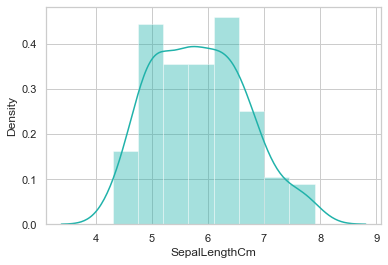

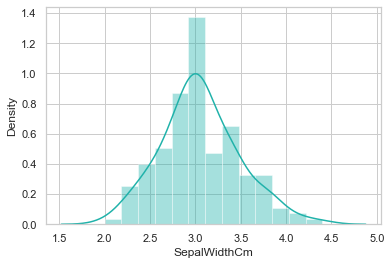

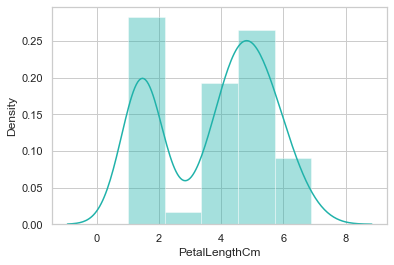

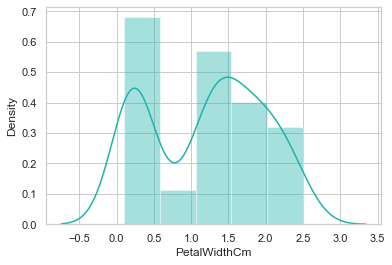

In [155]:
df_numerics_only = data.select_dtypes(include=np.number)
for column in df_numerics_only.columns:
    
    sns.distplot(data[column],color="#20B2AA") # Stack these distributions together with different colors 
    plt.show()


Observations:

The Distplot of SepalLengthCm,and SepalWidthCm column are approximately normally distributed. And if we see other columns like PetalLengthCm, and PetalWidthCm these are not normally distributed.

#### Visualising Categorical Variables


#### Distribution of Species

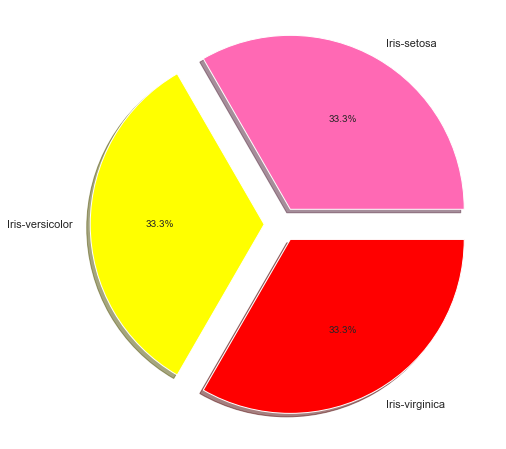

In [156]:
#Churn rate
plt.figure(figsize=(12,8))
labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
explode=[.1,.1,.1]
mycolors = ["hotpink", "Yellow","red"]
sizes=data.Species.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True,colors = mycolors)
plt.show()

Our Iris data was declared a balanced dataset when we observed that each class had an equal number of data points. In our sample, no Class completely dominates.


#### Relationship b/w all features

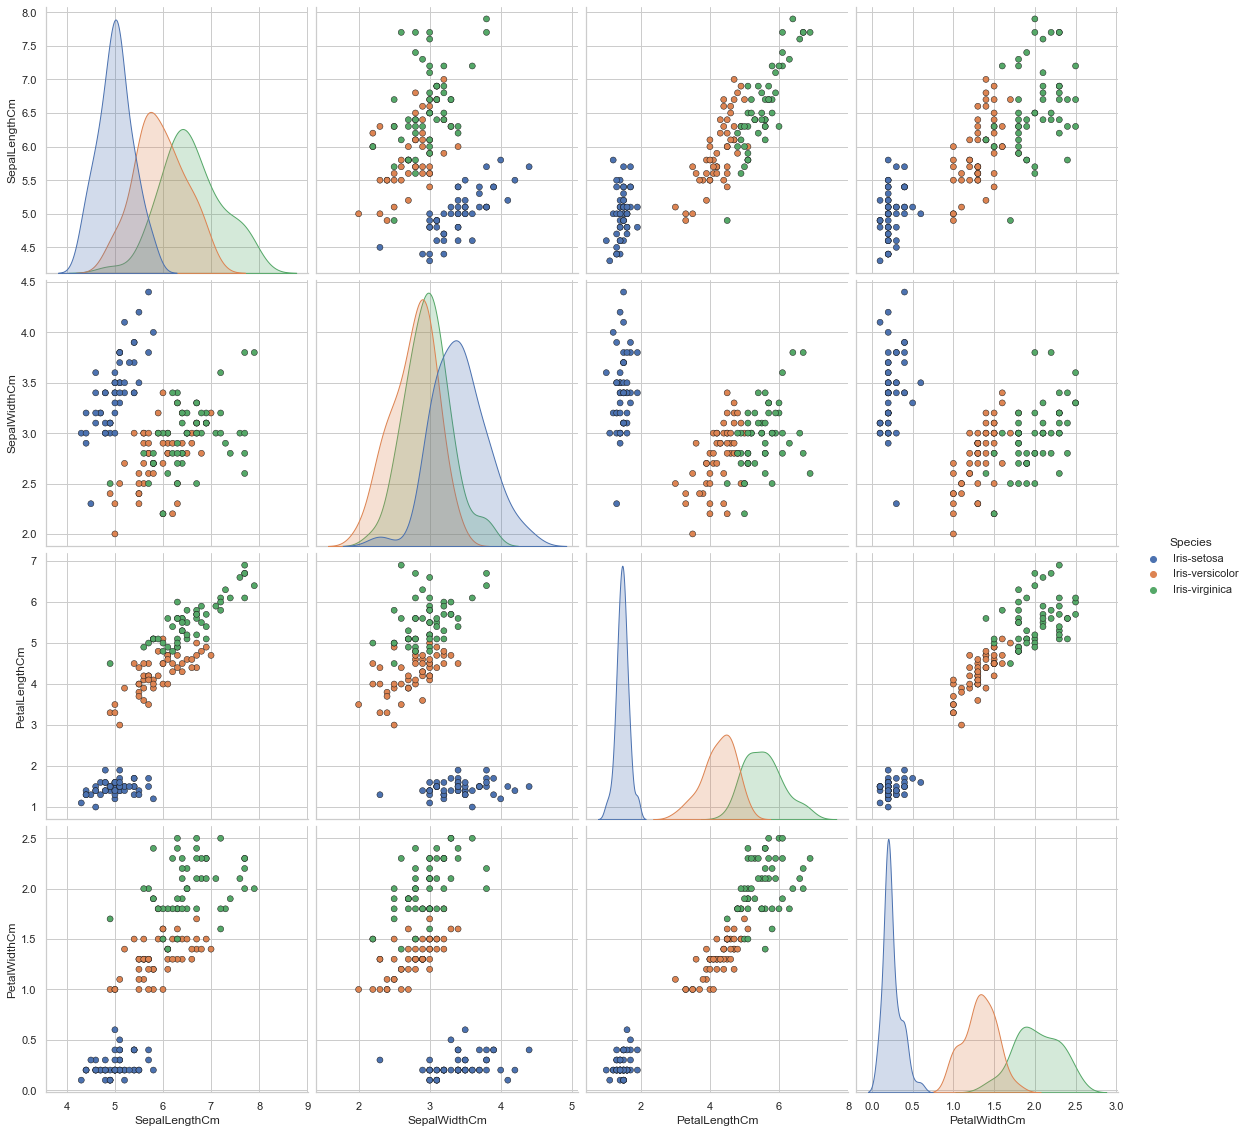

In [157]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(data, hue='Species', diag_kind = 'kde',
             plot_kws = {'edgecolor': 'k'}, size = 4)
plt.show()

By examining the pair plot results, we can be certain that all blue dots are clearly distinguished from the other two classes. But there is some overlap between virginica and versicolor.

We saw in the pair plot that some feature combinations had very little overlap between Versicolor and verginica, indicating that these features are crucial to the success of our classification work.

### Outlier Detection

Outliers are the values that look different from the other values in the data. 

Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)). Outliers, if any, are plotted as points left and right the plot.

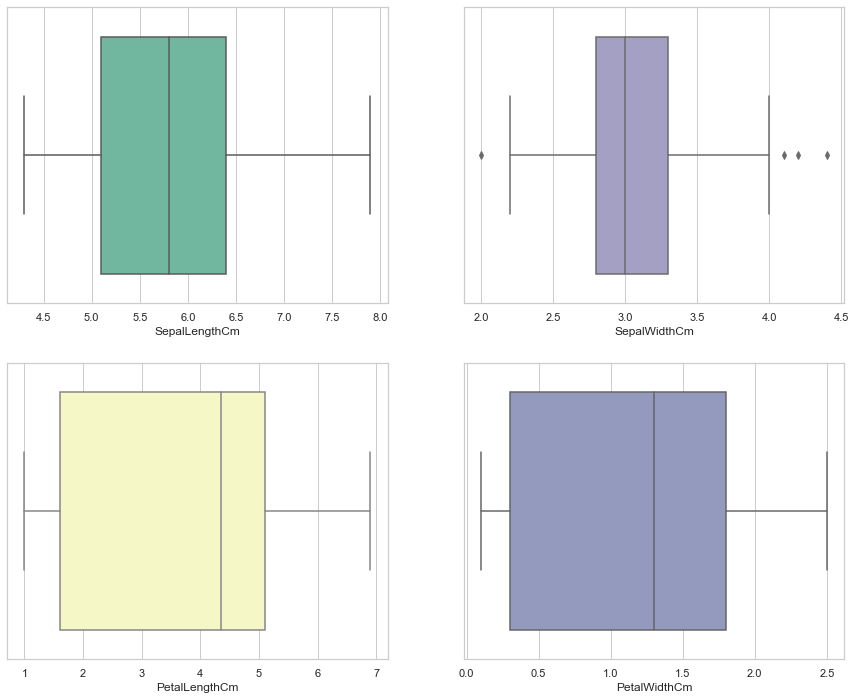

In [158]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (15,12))
plt1 = sns.boxplot(data['SepalLengthCm'], ax = axs[0,0],palette='BuGn')
plt2 = sns.boxplot(data['SepalWidthCm'], ax = axs[0,1],palette='Purples_r')
plt3 = sns.boxplot(data['PetalLengthCm'], ax = axs[1,0],palette='RdYlGn')
plt1 = sns.boxplot(data['PetalWidthCm'], ax = axs[1,1],palette='BuPu')

plt.show()

Outlier Treatment :
1. SepalWidthCm have considerable some outliers.But these and not big number of outliers.
2. We are not droping the outliers as we don't have much data.

### Exploring distribution plot for all features

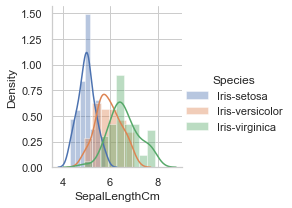

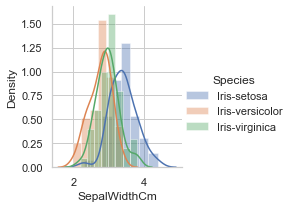

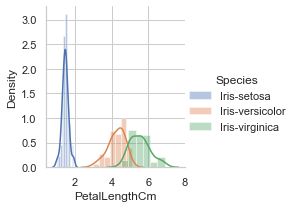

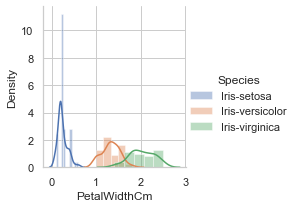

In [159]:
for i in data.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(data,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

In [160]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Mapping the target variable in numeric values

In [161]:
data['Species']=data['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [162]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Data Spliting

Splitting the dataset is the next step in data preprocessing in machine learning. Every dataset for Machine Learning model must be split into two separate sets – training set and test set. 

Training set denotes the subset of a dataset that is used for training the machine learning model. A test set, on the other hand, is the subset of the dataset that is used for testing the machine learning model. The ML model uses the test set to predict outcomes. 

Here, the second line splits the arrays of the dataset into random train and test subsets. Here includes four variables:

x_train – features for the training data

x_test – features for the test data

y_train – dependent variables for training data

y_test – independent variable for testing data

In [163]:
#split dataset in features and target variable
X = data.drop('Species',axis='columns')
y = data['Species']

In [164]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((105, 4), (45, 4), (105,), (45,))

### Model Building

Machine Learning models can be understood as a program that has been trained to find patterns within new data and make predictions. These models are represented as a mathematical function that takes requests in the form of input data, makes predictions on input data, and then provides an output in response.

First, these models are trained over a set of data, and then they are provided an algorithm to reason over data, extract the pattern from feed data and learn from those data. Once these models get trained, they can be used to predict the unseen dataset.

### Decision Tree

In [165]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the classifier 
classifier = DecisionTreeClassifier()

# fit the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

In [167]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

We can print a classification report as follows:-

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.93      0.96        14
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



The model accuracy score  is 0.98 in the model. 


### Visualize Decision Tree

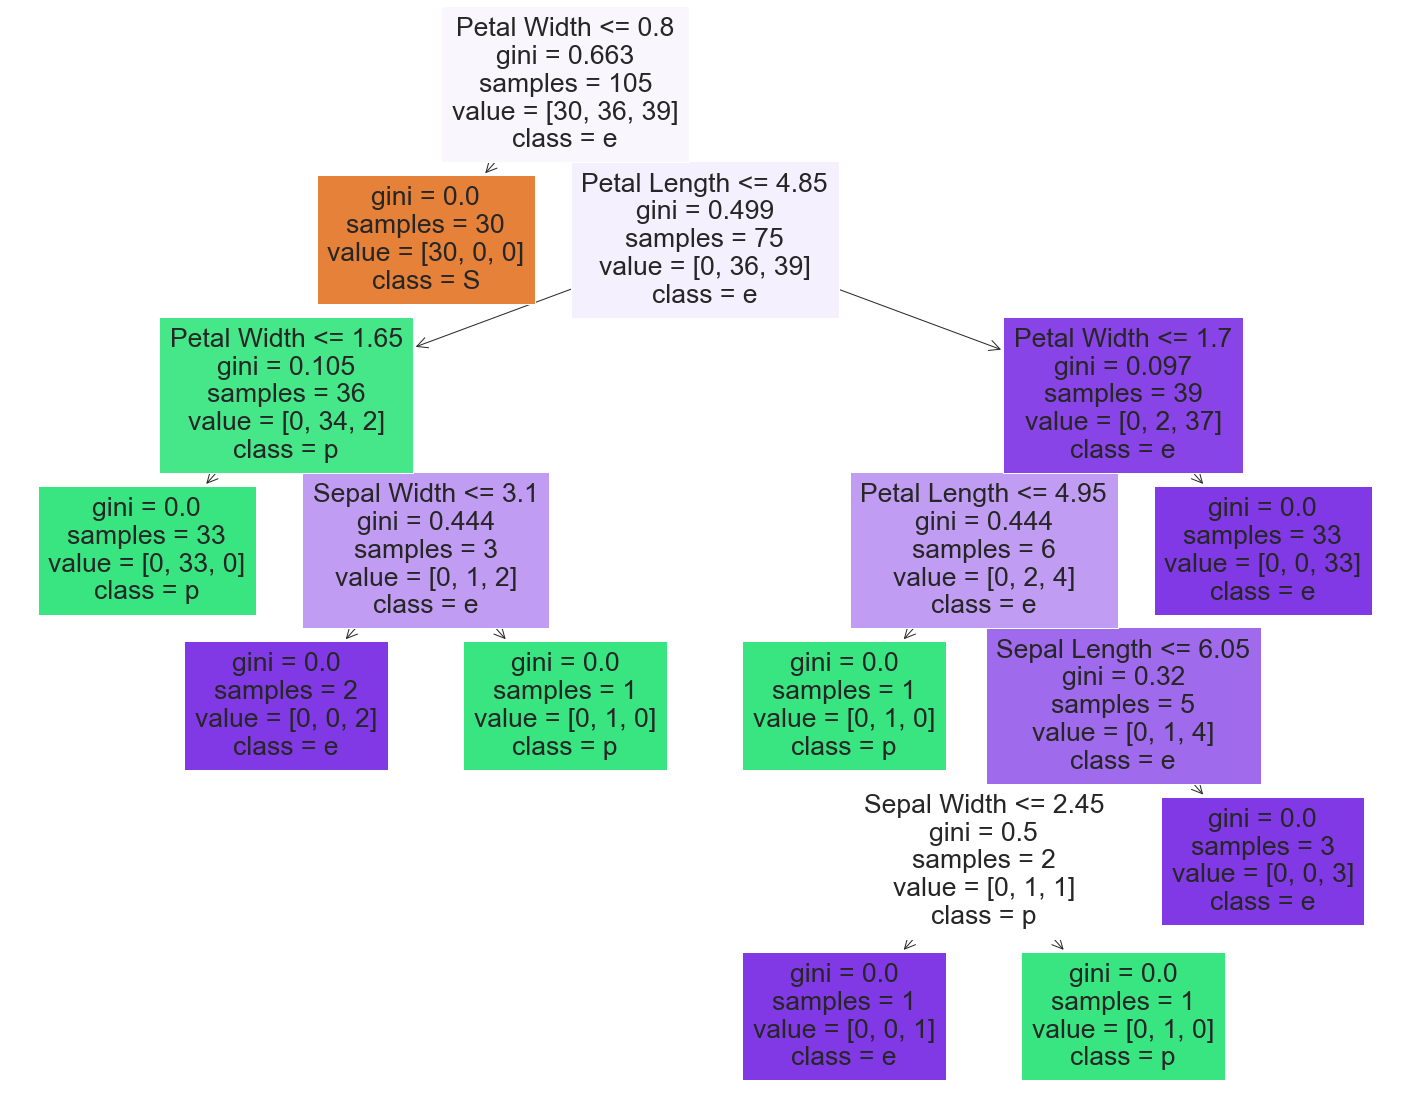

In [169]:
from sklearn import tree
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
target_names= 'Species'
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=FEATURE_NAMES,  
                   class_names=target_names,
                   filled=True)

### Model Deploy

In [170]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(classifier, pickle_out) 
pickle_out.close()

In [171]:
%%writefile app.py
import pandas as pd
import numpy as np
import pickle
import requests
import json
import streamlit as st
from streamlit_lottie import st_lottie  # pip install streamlit-lottie
from PIL import Image

# loading in the model to predict on the data
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)

def welcome():
    return 'welcome all'

# defining the function which will make the prediction using
# the data which the user inputs

def load_lottieurl(url: str):
    r = requests.get(url)
    if r.status_code != 200:
        return None
    return r.json()


def prediction(sepal_length, sepal_width, petal_length, petal_width):

    prediction = classifier.predict(
        [[sepal_length, sepal_width, petal_length, petal_width]])
    print(prediction)
    return prediction
    

# this is the main function in which we define our webpage
def main():
 
        # here we define some of the front end elements of the web page like
    # the font and background color, the padding and the text to be displayed
    html_temp = """
    <div style ="background-color:pink;padding:15px">
    <h1 style ="color:orange;text-align:center;">Iris Flower Classifier ML App </h1>
    </div>
    """
    
    
    


# this line allows us to display the front end aspects we have
# defined in the above code
    st.markdown(html_temp, unsafe_allow_html = True)
    
    lottie_hello = load_lottieurl("https://assets10.lottiefiles.com/packages/lf20_vps4jt0g.json")

    st_lottie(lottie_hello,speed=2,reverse=False,loop=True,quality="low",height=400,width=None,key=None)
    

    sepal_length = st.number_input("Sepal Length")
    sepal_width = st.number_input("Sepal Width")
    petal_length = st.number_input("Petal Length")
    petal_width = st.number_input("Petal Width")
    result =""

    if st.button("Predict"):
        result = prediction(sepal_length, sepal_width, petal_length, petal_width)
        
    
        
    if result==1:
        st.write('This is setosa')
    elif result==2:
        st.write('This is versicolor')
    else:
        st.write('This is virginica')
        
    

if __name__=='__main__':
    main()


Overwriting app.py


In [ ]:
!streamlit run app.py --server.port=939